In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
disaster_data=pd.read_csv(r"C:\Users\Ezgi\Downloads\synthetic_disaster_events_2025.csv")

In [3]:
disaster_data.head(5)

,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
0,1,Wildfire,Chile,-34.681672,-71.819529,2025-08-27,8,31104,2768213.39,5.12,Yes,0.59,1
1,2,Hurricane,India,22.128569,78.023951,2023-05-29,5,29340,5996226.87,44.43,No,0.26,0
2,3,Volcanic Eruption,Italy,42.316058,11.031447,2023-01-15,7,34804,9222541.48,49.30,No,0.94,1
3,4,Drought,Chile,-33.436253,-69.984615,2024-02-08,8,31191,1827703.09,65.56,Yes,0.94,1
4,5,Volcanic Eruption,Turkey,39.400977,37.006822,2023-12-23,8,46284,13435921.49,60.96,No,0.92,1


In [4]:
disaster_data.shape

(20000, 13)

In [5]:
disaster_data.columns

Index(['event_id', 'disaster_type', 'location', 'latitude', 'longitude',
       'date', 'severity_level', 'affected_population',
       'estimated_economic_loss_usd', 'response_time_hours', 'aid_provided',
       'infrastructure_damage_index', 'is_major_disaster'],
      dtype='object')

In [6]:
disaster_data.describe()

,event_id,latitude,longitude,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,infrastructure_damage_index,is_major_disaster
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.00000
mean,10000.500000,18.749811,41.976629,5.489300,27641.248950,4.831073e+06,36.369664,0.557306,0.40005
std,5773.647028,25.026759,82.535922,2.866269,16017.199074,3.624308e+06,20.420570,0.209064,0.48992
min,1.000000,-43.127383,-102.133704,1.000000,0.000000,0.000000e+00,1.000000,0.060000,0.00000
25%,5000.750000,3.560059,8.346726,3.000000,14755.000000,2.024090e+06,18.407500,0.400000,0.00000
50%,10000.500000,24.361006,74.600322,5.000000,27612.500000,4.031418e+06,36.560000,0.550000,0.00000
75%,15000.250000,38.285895,117.460836,8.000000,40016.500000,7.018268e+06,54.020000,0.700000,1.00000
max,20000.000000,48.452161,145.902669,10.000000,75147.000000,2.186893e+07,71.990000,1.000000,1.00000


In [7]:
disaster_data["date"]=pd.to_datetime(disaster_data["date"])
disaster_data.head()

,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
0,1,Wildfire,Chile,-34.681672,-71.819529,2025-08-27,8,31104,2768213.39,5.12,Yes,0.59,1
1,2,Hurricane,India,22.128569,78.023951,2023-05-29,5,29340,5996226.87,44.43,No,0.26,0
2,3,Volcanic Eruption,Italy,42.316058,11.031447,2023-01-15,7,34804,9222541.48,49.30,No,0.94,1
3,4,Drought,Chile,-33.436253,-69.984615,2024-02-08,8,31191,1827703.09,65.56,Yes,0.94,1
4,5,Volcanic Eruption,Turkey,39.400977,37.006822,2023-12-23,8,46284,13435921.49,60.96,No,0.92,1


In [8]:
disaster_data["year"]=disaster_data["date"].dt.year
disaster_data["year"].value_counts(normalize=True) # Disaster distribution rate by year

year
2024    0.3349
2023    0.3312
2025    0.3134
2022    0.0205
Name: proportion, dtype: float64

The data was aggregated on a yearly basis to reduce noise and better visualize long-term trends.

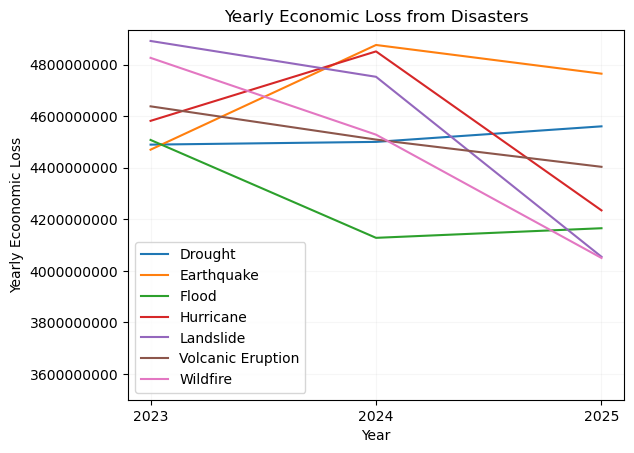

In [9]:
filtered_data=disaster_data[disaster_data["year"]>=2023]
yearly_ecoonomic_loss=filtered_data.groupby(["year","disaster_type"])["estimated_economic_loss_usd"].sum()
pivot=yearly_ecoonomic_loss.unstack()
for i in pivot.columns:
    plt.plot(pivot.index,pivot[i].values,label=i)
plt.xlabel("Year")
plt.ylabel("Yearly Ecoonomic Loss")
plt.title("Yearly Economic Loss from Disasters")
plt.grid(True, alpha=0.1)
plt.xticks(pivot.index, pivot.index.astype(int)) # X-axis ticks were manually set to ensure year-level readability.
plt.legend()
plt.ticklabel_format(style="plain", axis="y")
plt.ylim(bottom=3500000000) # The y-axis lower bound was adjusted to improve visual interpretability, as all values are in the billion-dollar range.
plt.show()

In [10]:
total_loss=disaster_data.groupby("year")["estimated_economic_loss_usd"].sum()
total_loss   # Total loss by year

year
2022    1.840256e+09
2023    3.240410e+10
2024    3.214472e+10
2025    3.023238e+10
Name: estimated_economic_loss_usd, dtype: float64

In [11]:
top_ten_disaster=disaster_data.sort_values("estimated_economic_loss_usd", ascending=False).head(10)
top_ten_disaster[["disaster_type","location","year","affected_population","estimated_economic_loss_usd"]
                ].style.format({"estimated_economic_loss_usd": "{:,.2f}"}
                              ).hide(axis="index") # The top 10 disasters with the greatest economic losses.

disaster_type,location,year,affected_population,estimated_economic_loss_usd
Drought,India,2024,73254,"21,868,934.78"
Hurricane,Japan,2024,71344,"20,383,156.95"
Volcanic Eruption,Chile,2023,67338,"20,178,637.82"
Flood,USA,2023,68278,"20,006,350.45"
Drought,Turkey,2023,67251,"19,965,198.29"
Hurricane,Italy,2023,72062,"19,719,668.83"
Wildfire,Chile,2025,65691,"19,683,707.46"
Flood,USA,2024,66526,"19,567,411.27"
Volcanic Eruption,Italy,2023,63857,"19,048,589.57"
Earthquake,Japan,2024,72816,"18,907,088.54"


In [12]:
summary_table = (disaster_data.groupby("disaster_type")
    .agg({"estimated_economic_loss_usd": ["mean", "median", "sum"],
        "infrastructure_damage_index": "mean"
    }))  # This is a table showing economic loss values and the severity of infrastructure damage according to disaster types.
summary_table

estimated_economic_loss_usd                             \
                                         mean       median           sum   
disaster_type                                                              
Drought                          4.831245e+06  4015133.700  1.383185e+10   
Earthquake                       4.927598e+06  4104313.085  1.433931e+10   
Flood                            4.734479e+06  3984243.060  1.312871e+10   
Hurricane                        4.855863e+06  4028621.650  1.391690e+10   
Landslide                        4.836120e+06  4024796.260  1.398122e+10   
Volcanic Eruption                4.888907e+06  4110297.840  1.382094e+10   
Wildfire                         4.739552e+06  3970607.085  1.360251e+10   

                  infrastructure_damage_index  
                                         mean  
disaster_type                                  
Drought                              0.556172  
Earthquake                           0.554457  
Flood                                0.552560  
Hurricane                            0.558123  
Landslide                            0.557606  
Volcanic Eruption                    0.564174  
Wildfire                             0.558028

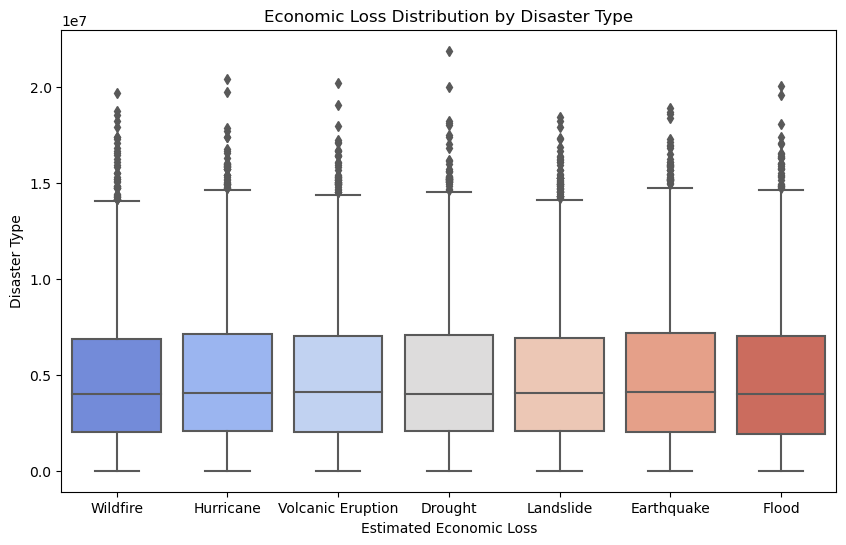

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=disaster_data, x="disaster_type", y="estimated_economic_loss_usd", palette="coolwarm")
plt.title("Economic Loss Distribution by Disaster Type")
plt.xlabel("Estimated Economic Loss")
plt.ylabel("Disaster Type")
plt.show()

Although the values for different disaster types are very close to each other, there is a noticeable difference between the mean and median values. This suggests that the distributions may be slightly skewed. Additionally, the overall similarity 
across disaster types indicates that this dataset might be simulated or artificially balanced rather than representing 
real-world variability.

In [18]:
npm install -g @anthropic/claude-code

SyntaxError: invalid syntax (1986077408.py, line 1)

SyntaxError: invalid syntax (2025619808.py, line 1)